# Теория информации

In [48]:
#all imports here
import pickle as pkl

from collections import OrderedDict
import heapq

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from math import log2

#... add your own if necessary

Энтропию можно использовать не только для описания хаотичности, беспорядочности и уровня неопределённости, но и для того, чтобы исследовать зависимость между случайными величинами, используя теорию информации. Начнём с базовых вещей и постепенно дойдём до ультрапопулярной эвристики выбора важных признаков для машинного обучения -- взаимной информации.

## Поисследуем энтропию

Будем предполагать, что нам даны две случайных величины $X,Y$, будем предполагать, что они дискретные, выкладок этот факт не изменит.

### Независимость?

Покажем, что если две случайных величины $X,Y$ независимы, то $H(X,Y)=H(X)+H(Y)$.


From this moment we will assume $X, Y$ are discrete, so

$$
H(X) = - \sum_{x} p_X(x) \log p_X(x)
$$

$$
H(X, Y) = - \sum_{x,y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) =
 - \sum_{x,y} p_X(x)p_Y(y) \log p_X(x)p_Y(y) = - \sum_{x,y} p_X(x)p_Y(y) \left(\log p_X(x) + \log p_Y(y)\right) =
$$
$$
= - \sum_{x,y} p_X(x)p_Y(y) \log p_X(x) - \sum_{x,y} p_X(x)p_Y(y) \log p_Y(y) =
 - \sum_x p_X(x) \log p_X(x) \sum_yp_Y(y) - \sum_y p_Y(y) \log p_Y(y) \sum_xp_X(x)=
$$
$$
= - \sum_x p_X(x) \log p_X(x) - \sum_y p_Y(y) \log p_Y(y) = H(X)+H(Y)
$$


### Зависимость?

Покажем, что в общем случае

$$
H(X,Y) = H(X) + H(Y \vert X)
$$
и вычислим, чему будет равен остаток $H(Y \vert X)$. Он носит название *условной энтропии*, не путайте с энтропией условного распределения.

$$
H(X, Y) = - \sum_{x,y} p_{X,Y}(x, y) \log p_{X,Y}(x, y) = 
 - \sum_{x,y} p_X(x)p_{Y|X}(y|x) \log p_X(x)p_{Y|X}(y|x) = - \sum_{x,y} p_X(x)p_{Y|X}(y|x) \left(\log p_X(x) + \log p_{Y|X}(y|x)\right) =
$$
$$
= - \sum_{x,y} p_X(x)p_{Y|X}(y|x) \log p_X(x)  - \sum_{x,y} p_X(x)p_{Y|X}(y|x)  \log p_{Y|X}(y|x) =
 - \sum_{x} p_X(x) \log p_X(x) \sum_{y}p_{Y|X}(y|x)  - \sum_{x} p_X(x) \sum_{y}p_{Y|X}(y|x)  \log p_{Y|X}(y|x) = H(X)+H(X|Y)
$$

We can interpret $H(Y)$ as the level of uncertainty in $Y$ or the number of bits needed to encode it. So, if I understood it right, conditional entropy $ H(Y \mid X) $ measures uncertainty in $ Y $, if $ X $ is known. In coding theory, if $ X $ reduces uncertainty in $ Y $, fewer bits are required for encoding $Y$ compared to encoding it independently. E.g. if $H(Y|X) = 0$ that means $Y$ is determined, and we don't need extra information to encode it if we already know $X$.  

## Взаимная информация

Можно рассмотреть разницу

$$
I(X,Y) = H(X) - H(X \vert Y),
$$

которая отражает в некотором смысле (вы наверняка об этом думали в окошке выше) уровень использования информации о значении $Y$ при кодировании $X$ (если мы о кодировании). Эта величина носит название *взаимной информации* и является ещё одним хорошим способом исследования зависимости между случайными величинами. Библиотека `sklearn` позволяет оценивать её по данным и тем самым выделять самые важные признаки для моделей машинного обучения.

### Симметричность

Докажем, что $I(X,Y)=I(Y,X)$.

$$
I(X,Y) = H(X)-H(X|Y) = H(X)+H(Y)-H(X,Y) = H(X)+H(Y)-H(Y,X) = H(X)-H(Y|X) = I(Y,X)
$$

### Связь с KL

Докажем, что $I(X,Y)= D_{KL}( p_{X,Y} \vert p_{X}p_{Y})$. Слева совместное распределение $X,Y$, справа -- произведение вероятностей(или плотностей) $X,Y$. 

$$
D_{\text{KL}}( p_{X,Y} | p_X p_Y ) = \sum_{x,y} p_{X,Y}(x,y) \log \frac{p_{X,Y}(x,y)}{p_X(x)p_Y(y)} = 
\sum_{x,y} p_{X,Y}(x,y) \left( \log p_{X,Y}(x,y) - \log(p_X(x) p_Y(y)) \right) =
$$
$$
= \sum_{x,y} p_{X,Y}(x,y) \log p_{X,Y}(x,y) - \sum_{x,y} p_{X,Y}(x,y) \log(p_X(x)p_Y(y)) = 
 \sum_{x,y} p_{X,Y}(x,y) \log p_{X,Y}(x,y) - \sum_{x,y} p_{X,Y}(x,y) \log(p_X(x))  - \sum_{x,y} p_{X,Y}(x,y) \log(p_Y(y)) = 
$$
$$
= -H(X,Y) - \sum_{x}\log(p_X(x))\sum_y p_{X,Y}(x,y)   - \sum_{y} \log(p_Y(y))\sum_{x} p_{X,Y}(x,y) =
 -H(X,Y) - \sum_{x}\log(p_X(x))p_{X}(x) - \sum_{y} \log(p_Y(y))p_{Y}(y) =
$$
$$
=H(X)+H(Y)-H(X,Y) = I(X,Y)
$$

### Какой смысл?..


Taking into account everything we said about $H(X|Y)$ and the fact that $I(X,Y)=H(X)-H(X|Y)$, we can assume, that $I(X, Y)$ is common information, shared between $X$ and $Y$.

We can interpret it as the number of bits by which we can reduce the length of $X$ or the decrease of uncertainty of $X$, if we already know $Y$.

## Максимальная энтропия

### Экспоненциальное распределение

Вычислим энтропию для экспоненциального распределения $Exp(\lambda)$ и распределения Лапласа $Laplace(0,\lambda)$, имеющее плотность $\frac{\lambda}{2} e^{-\lambda \vert x\vert }$.

Let us start from $X\sim\text{Exp}(\lambda)$:
$$
H(X) = -\int_0^\infty \lambda e^{-\lambda x} \ln\left(\lambda e^{-\lambda x}\right)dx = 
-\int_0^\infty \lambda e^{-\lambda x} \left(\ln\lambda -\lambda x\right)dx = 
\int_0^\infty \lambda^2 x e^{-\lambda x}dx -\int_0^\infty \lambda e^{-\lambda x} \ln\lambda dx =
1 - \ln\lambda
$$
$Y\sim\text{Laplace}(0, \lambda)$:
$$
H(Y) = -\int_{-\infty}^\infty \frac{\lambda}{2} e^{-\lambda |x|} \ln\left(\frac{\lambda}{2} e^{-\lambda |x|}\right)dx = 
-\int_{0}^\infty \lambda e^{-\lambda x} \ln\left(\frac{\lambda}{2} e^{-\lambda x}\right)dx = 
-\int_{0}^\infty \lambda e^{-\lambda x} \left(\ln\frac{\lambda}{2} -\lambda x\right)dx = 1 - \ln\frac{\lambda}{2}
$$


Докажем, что Экспоненциальное распределение $Exp(\lambda)$ имеет максимальную энтропию среди всех абсолютно непрерывных вероятностных распределений с фиксированным средним и имеющих ненулевую плотность в области $x\geq 0$.

To prove this, we use the Lagrange multiplier method with density normalization $\int_{0}^{\infty} f(x) \, dx = 1$ 
and fixed expectation $\int_{0}^{\infty} x f(x) \, dx = \mu$

Let's write the functional using the Lagrange multipliers $ \lambda_0 $ and $ \lambda_1 $:

$$
J(f) = -\int_{0}^{\infty} f(x) \ln f(x) \, dx - \lambda_0 \left( \int_{0}^{\infty} f(x) \, dx - 1 \right) - \lambda_1 \left( \int_{0}^{\infty} x f(x) \, dx - \mu \right)
$$

Consider a small perturbation of the density $ f(x) \rightarrow f(x) + \delta f(x) $. The change in the $ J(f) $ is equal to:

$$
\delta J = -\int_{0}^{\infty} (\ln f(x) + 1) \delta f(x) \, dx - \lambda_0 \int_{0}^{\infty} \delta f(x) \, dx - \lambda_1 \int_{0}^{\infty} x \delta f(x) \, dx
$$

In extremum, the variation must be equal to zero for all $ \delta f(x) $, so:

$$
\frac{\delta J}{\delta f(x)} = -(\ln f(x) + 1) - \lambda_0 - \lambda_1 x = 0
$$
$$
\ln f(x) = -1 - \lambda_0 - \lambda_1 x
$$
$$
f(x) = e^{-1 - \lambda_0 - \lambda_1 x} = C e^{-\lambda_1 x}
$$

where $ C = e^{-1 - \lambda_0} $

Using restrictions, we find the values of $ C $ and $ \lambda_1 $.

$$
\int_{0}^{\infty} f(x) \, dx = C \int_{0}^{\infty} e^{-\lambda_1 x} \, dx = \frac{C}{\lambda_1} = 1
\quad\Longrightarrow\quad
C = \lambda_1
$$

$$
\int_{0}^{\infty} x f(x) \, dx = C \int_{0}^{\infty} x e^{-\lambda_1 x} \, dx = \frac{C}{\lambda_1^2} = \mu
$$

$$
\frac{\lambda_1}{\lambda_1^2} = \mu \quad \implies \quad \frac{1}{\lambda_1} = \mu
\quad\implies\quad
\lambda_1 = \frac{1}{\mu}
$$

So density looks like:

$$
f(x) = \frac{1}{\mu} e^{- \frac{x}{\mu}}
$$

And this is exactly the density of an exponential distribution with $ \lambda = \frac{1}{\mu} $:

$$
f(x) = \lambda e^{- \lambda x}, \quad x \geq 0
$$

## Строим свой код, основанный на частотах (3 балла)

Представим себе для примера достаточно большую книгу (например, Войну и Мир Льва Николаевича Толстого). Для того, чтобы записывать буквы в кодировке UTF-8 требуется от 2 до 4 байт (каждый 8бит). Но книга -- это не просто какой-то iid равновероятный поток символов, а структурированный текст, структуру которого можно по-разному использовать. К примеру, мы можем задуматься над тем, чтобы сжать её, используя информацию о том, какие символы встречаются чаще: ведь более частые можно кодировать более короткими кодовыми словами, а более редкие -- более длинными.

В этом идея [кода Хаффмана](https://compression.ru/download/articles/huff/huffman_1952_minimum-redundancy-codes.pdf), который мы попробуем поисследовать в самой простой наивной имплементации.

### Вычисляем языковую статистику

Возьмём для примера текст вики-страницы [МО1](http://wiki.cs.hse.ru/%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_1)

In [7]:
with open("moText.txt", "r", encoding="utf-8") as f:
    MOText = "\n".join(f.readlines())

print(MOText[:180])

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 го


Это не сильно большой, но не очень маленький текст.

In [8]:
print(len(MOText))

10001


Вычислим частоту каждого символа, сохранив их в упорядоченный словарь (OrderedDict, пригодится для сортировок)  вида {<символ>: <частота>}.

In [18]:
symFreqs = OrderedDict()

for char in MOText:
    if char in symFreqs:
        symFreqs[char] += 1
    else:
        symFreqs[char] = 1

In [19]:
for key, val in symFreqs.items():
    print(f"{key}: {val}")
print(f"In total {len(symFreqs)} unique symbols, max freq= {max([val for val in symFreqs.values()])}")

=: 89
 : 912
О: 13
к: 134
у: 99
р: 185
с: 180
е: 389

: 525
[: 81
Ф: 6
а: 378
й: 63
л: 159
:: 96
M: 27
L: 13
_: 52
s: 197
u: 59
r: 125
f: 24
a: 145
c: 67
e: 217
.: 163
p: 114
n: 105
g: 44
|: 185
2: 140
8: 9
0: 77
x: 13
b: 30
o: 140
d: 46
l: 87
t: 305
]: 81
К: 41
ч: 89
и: 343
т: 175
я: 70
д: 143
н: 350
о: 369
в: 155
3: 16
-: 71
г: 54
h: 147
/: 281
m: 125
i: 134
П: 57
М: 53
И: 38
Н: 15
В: 26
Ш: 6
Э: 12
1: 64
м: 106
х: 18
6: 15
': 24
Л: 4
w: 43
k: 48
v: 30
С: 32
Е: 6
А: 38
з: 59
ы: 70
4: 14
5: 16
п: 85
Р: 17
G: 9
H: 11
y: 35
S: 13
X: 5
7: 13
F: 10
Q: 2
U: 7
q: 7
P: 20
A: 12
ц: 29
э: 7
?: 5
O: 3
B: 5
E: 8
R: 12
C: 16
9: 16
&: 1
z: 7
T: 17
D: 9
W: 9
V: 8
J: 7
ш: 35
(: 13
ю: 16
,: 33
б: 58
): 13
+: 18
<: 2
>: 1
@: 3
ъ: 1
Ч: 1
ж: 19
Z: 10
щ: 8
ё: 5
Т: 9
I: 7
N: 15
ь: 43
ф: 12
{: 2
": 4
!: 11
Г: 2
Б: 29
Y: 5
Д: 32
K: 6
j: 1
У: 5
Я: 3
}: 2
З: 11
Ю: 1
*: 21
—: 4
Ж: 1
%: 3
In total 148 unique symbols, max freq= 912


### Строим Кодер и Декодер Хаффмана

Это хорошее упражнение для ценителей алгоритмов, но давайте сократим себе время и попробуем адаптировать одну из [доступных реализаций](https://www.geeksforgeeks.org/huffman-coding-in-python/) под наш сценарий, обернув в привычную классовую структуру и сохранив максимальную представленность самого алгоритма.

In [31]:
#taken from https://www.geeksforgeeks.org/huffman-coding-in-python/
class Node:
    def __init__(self, symbol=None, frequency=None):
        #print("CREATING", symbol, frequency)
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency


def build_huffman_tree(chars, freq):
    # Create a priority queue of nodes
    priority_queue = [Node(char, f) for char, f in zip(chars, freq)]
    heapq.heapify(priority_queue)

    # Build the Huffman tree
    while len(priority_queue) > 1:
        left_child = heapq.heappop(priority_queue)
        right_child = heapq.heappop(priority_queue)
        merged_node = Node(frequency=left_child.frequency + right_child.frequency)
        merged_node.left = left_child
        merged_node.right = right_child
        heapq.heappush(priority_queue, merged_node)

    return priority_queue[0]


def generate_huffman_codes(node, code="", huffman_codes={}):
    if node is not None:
        if node.symbol is not None:
            huffman_codes[node.symbol] = code
        else:
            generate_huffman_codes(node.left, code + "0", huffman_codes)
            generate_huffman_codes(node.right, code + "1", huffman_codes)

    return huffman_codes


def runTest():
    # Given example (try it to test)
    chars = ['a', 'b', 'c', 'd', 'e', 'f']
    freq = [4, 7, 15, 17, 22, 42]

    # Build the Huffman tree
    root = build_huffman_tree(chars, freq)

    # Generate Huffman codes
    huffman_codes = generate_huffman_codes(root)

    # Print Huffman codes
    for char, code in huffman_codes.items():
        print(f"Character: {char}, Code: {code}")


runTest()

Character: f, Code: 0
Character: a, Code: 1000
Character: b, Code: 1001
Character: c, Code: 101
Character: d, Code: 110
Character: e, Code: 111


Надеемся, что этот код заработал.... Теперь напишем кодер, используя эту технологию.

In [73]:
class HuffmanCoderDecoder:

    def __init__(self, symbolProbaTable):
        """_summary_

        Args:
            symbolProbaTable (dict): a dict with symbol(keys) and probabilities (val)
        """
        self.symbols = list(symbolProbaTable.keys())
        self.probas = list(symbolProbaTable.values())
        self.symbolProbaTable = symbolProbaTable
        self.root = None
        self.encoderTable = {}
        self.decoderTable = {}
        self.fit()

    def fit(self):
        """
        Sets up encoder and decoder tables
        """
        self.root = self.build_huffman_tree(self.symbols, self.probas)
        
        self.encoderTable = self.generate_huffman_codes(self.root)
        self.decoderTable = {code: char for char, code in self.encoderTable.items()}
    
    def build_huffman_tree(self, chars, freq):
        priority_queue = [Node(char, f) for char, f in zip(chars, freq)]
        heapq.heapify(priority_queue)

        while len(priority_queue) > 1:
            left_child = heapq.heappop(priority_queue)
            right_child = heapq.heappop(priority_queue)
            merged_node = Node(frequency=left_child.frequency + right_child.frequency)
            merged_node.left = left_child
            merged_node.right = right_child
            heapq.heappush(priority_queue, merged_node)

        return priority_queue[0]
    
    def generate_huffman_codes(self, node, code="", huffman_codes=None):
        if huffman_codes is None:
            huffman_codes = {}
        if node is not None:
            if node.symbol is not None:
                huffman_codes[node.symbol] = code
            else:
                self.generate_huffman_codes(node.left, code + "0", huffman_codes)
                self.generate_huffman_codes(node.right, code + "1", huffman_codes)

        return huffman_codes

    def encode(self, text):
        """Encodes the text and returns encoded text

        Args:
            text (str): text to encode
        Returns:
            encodedText (str): encoded text
        """
        return ''.join([self.encoderTable[c] for c in text])

    def decode(self, text):
        """Decodes the encoded text and returns decoded text

        Args:
            text (str): text to decode
        Returns:
            decodedText (str): decoded text
        """
        decoded_text = ''
        current_code = ''

        for bit in text:
            current_code += bit
            if current_code in self.decoderTable:
                decoded_text += self.decoderTable[current_code]
                current_code = ''

        return decoded_text

In [74]:
textSample = MOText[:200]

#Create coder
huff = HuffmanCoderDecoder(symFreqs)
#Encode text
encText = huff.encode(textSample)
#decode text to check if it works
decText = huff.decode(encText)

In [75]:
print(encText)

1011100101110000011110000100000101001101111110011101111111000001011100101110001000100010001001001001100100111011010000110100011000100011110111011110001111111010001110110111101000100000010101101101010111010101010111101111010100101111111011101111011011011001001011001101111010111111111111011101100111100100010010101101000101011011000111101001010101101011110111101011101011001010110101111011101101011000010011001001100010001000100010010011010110111111001110111100010111011010010110011010111001011001011110101111000011100100011010111100010111110110011011110111001110010101101100110001000100000011011100110110111110011100000001010011011111100111011111101000010010010111101000010000111111011101011011100110001100010101011101010010101111011101011110110010100101000100000110001110100101100111100011111011111110000111110100011011010000100110100010011000001111000001011011110110110111111001100000100010000001100101101100101100001111001110000111001101111100011010111101101110010010101000100010001001111101111001

In [76]:
print(decText)

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 года.



'''Лектор:'''


In [77]:
print(textSample)

== О курсе ==



[[Файл:ML_surfaces.png|280px|borderless|left]]



Курс читается для студентов 3-го курса [https://cs.hse.ru/ami ПМИ ФКН ВШЭ] в 1-2 модулях.



Проводится с 2016 года.



'''Лектор:'''


Вычислим, какое получилось сжатие

In [78]:
print("Compression(%): ", len(textSample.encode('utf-8')) * 8 / len(encText) * 100)

Compression(%):  180.43654001616815


### Исследуем, как хорошо себя ведёт код при смене текста

Сравним написанный кодер на двух понравившихся текстах.

1. Для чистоты эксперимента очистим оба текста от символов, которых нет в другом тексте
2. Посчитаем таблицу частот для каждого из текстов
3. Обучим кодер на тексте 1
4. Обучим кодер на тексте 2
5. Сопоставим длину (в битах): 
   1. Текст1, закодированный кодером 1
   2. Текст2, закодированный кодером 1
   3. Текст1, закодированный кодером 2
   4. Текст2, закодированный кодером 2
6. Посчитаем KL-дивергенцию и кроссэнтропию в обе стороны между частотами кодера1 и кодера2

In [79]:
def clean_text(text1, text2):
    common_chars = set(text1).intersection(set(text2))
    cleaned_text1 = ''.join([ch for ch in text1 if ch in common_chars])
    cleaned_text2 = ''.join([ch for ch in text2 if ch in common_chars])
    return cleaned_text1, cleaned_text2

def calculate_frequencies(text):
    return dict(Counter(text))

def kl_divergence(p, q):
    kl_div = 0.0
    for key in p:
        if p[key] > 0 and key in q and q[key] > 0:
            kl_div += p[key] * log2(p[key] / q[key])
    return kl_div

def cross_entropy(p, q):
    ce = 0.0
    for key in p:
        if p[key] > 0 and key in q and q[key] > 0:
            ce += -p[key] * log2(q[key])
    return ce

def entropy(freqs):
    return -sum(p * log2(p) for p in freqs.values() if p > 0)

In [80]:
with open("text1.txt", "r", encoding="utf-8") as f:
    text1 = "\n".join(f.readlines())

with open("text2.txt", "r", encoding="utf-8") as f:
    text2 = "\n".join(f.readlines())

cleaned_text1, cleaned_text2 = clean_text(text1, text2)

freqs_text1 = calculate_frequencies(cleaned_text1)
freqs_text2 = calculate_frequencies(cleaned_text2)

total_text1 = sum(freqs_text1.values())
total_text2 = sum(freqs_text2.values())

prob_text1 = {char: freq / total_text1 for char, freq in freqs_text1.items()}
prob_text2 = {char: freq / total_text2 for char, freq in freqs_text2.items()}

coder1 = HuffmanCoderDecoder(prob_text1)
coder2 = HuffmanCoderDecoder(prob_text2)

encoded_text1_coder1 = coder1.encode(cleaned_text1)
encoded_text2_coder1 = coder1.encode(cleaned_text2)
encoded_text1_coder2 = coder2.encode(cleaned_text1)
encoded_text2_coder2 = coder2.encode(cleaned_text2)

len_text1_coder1 = len(encoded_text1_coder1)
len_text2_coder1 = len(encoded_text2_coder1)
len_text1_coder2 = len(encoded_text1_coder2)
len_text2_coder2 = len(encoded_text2_coder2)

kl_text1_to_text2 = kl_divergence(prob_text1, prob_text2)
kl_text2_to_text1 = kl_divergence(prob_text2, prob_text1)
ce_text1_to_text2 = cross_entropy(prob_text1, prob_text2)
ce_text2_to_text1 = cross_entropy(prob_text2, prob_text1)

entropy_text1 = entropy(prob_text1)
entropy_text2 = entropy(prob_text2)

In [85]:
print(f"KL(text1 | text2)={kl_text1_to_text2}")
print(f"KL(text2 | text1)={kl_text2_to_text1}")
print(f"CE(text1 | text2)={ce_text1_to_text2}")
print(f"CE(text2 | text1)={ce_text2_to_text1}")
print(f"H(text1)={entropy_text1}")
print(f"H(text2)={entropy_text2}")
print(f"Coding with text1: text1Len={len_text1_coder1}, text2Len={len_text2_coder1}")
print(f"Coding with text2: text1Len={len_text1_coder2}, text2Len={len_text2_coder2}")

KL(text1 | text2)=0.09665596629883151
KL(text2 | text1)=0.11034558969562645
CE(text1 | text2)=5.609550892773256
CE(text2 | text1)=5.645734076342534
H(text1)=5.5128949264744165
H(text2)=5.535388486646909
Coding with text1: text1Len=163906, text2Len=150129
Coding with text2: text1Len=167215, text2Len=146773


/var/folders/01/9fgfj_155d7bjqsw7tkb47m80000gn/T/ipykernel_69365/565773754.py:21: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/01/9fgfj_155d7bjqsw7tkb47m80000gn/T/ipykernel_69365/565773754.py:21: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/01/9fgfj_155d7bjqsw7tkb47m80000gn/T/ipykernel_69365/565773754.py:21: UserWarning: Glyph 25991 (\N{CJK UNIFIED IDEOGRAPH-6587}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/admin/opt/miniconda3/envs/HW2024-25/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/admin/opt/miniconda3/envs/HW2024-25/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/User

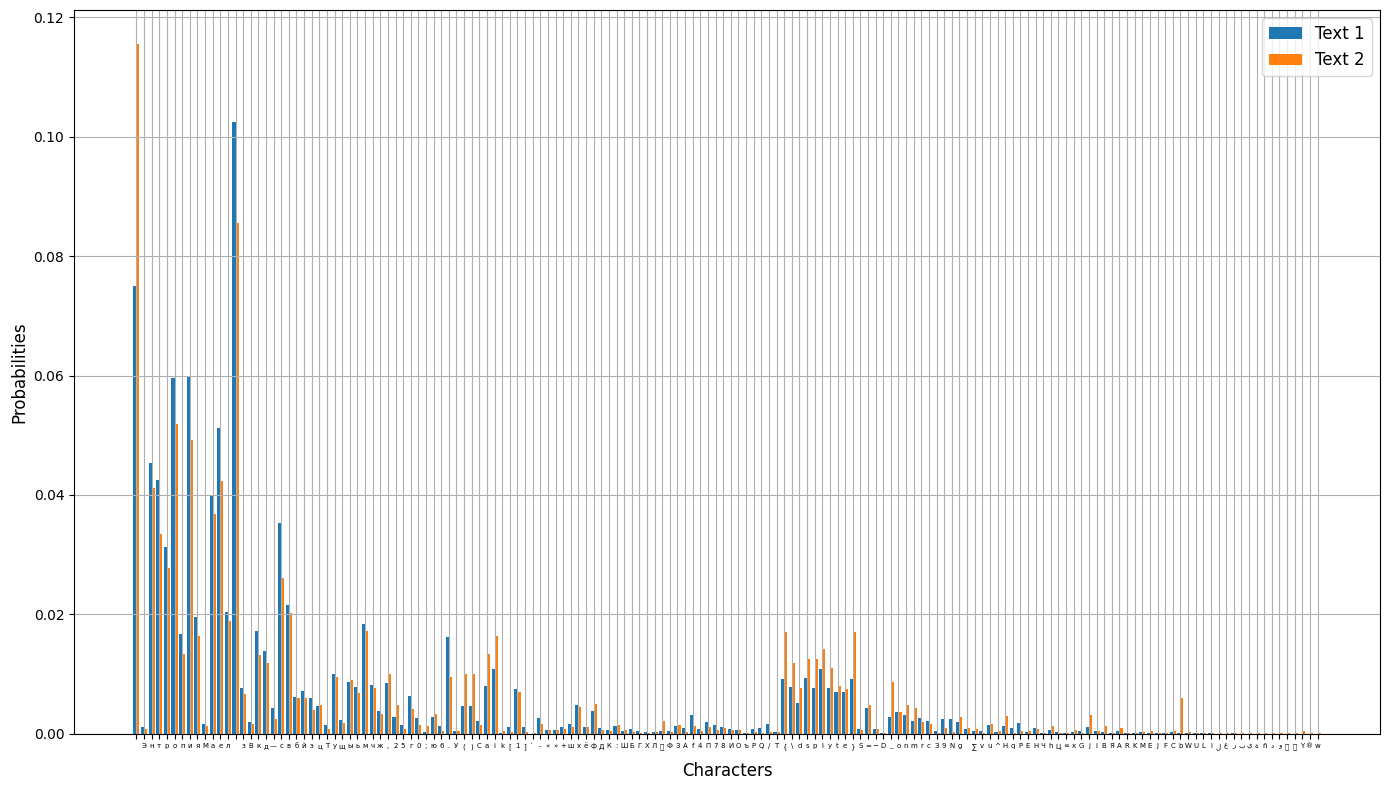

In [84]:
labels = list(prob_text1.keys())

freq1 = [prob_text1.get(char, 0) for char in labels]
freq2 = [prob_text2.get(char, 0) for char in labels]

x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x - 0.2, freq1, width=0.4, label='Text 1')
ax.bar(x + 0.2, freq2, width=0.4, label='Text 2')

ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=5)
ax.set_xlabel('Characters', fontsize=12)
ax.set_ylabel('Probabilities', fontsize=12)
ax.legend(fontsize=12)

ax.grid(True)

plt.tight_layout()

plt.show()


Since both texts are mathematical articles from Wikipedia, it is quite logical that they have similar frequency distributions and fairly low divergence. As expected, text coding was performed more efficiently using an encoder trained on the same text. Notably, encoding text using another was less efficient, but the code length increased by only two percent approximately